### Importing Libraries

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Import the cifar10 dataset from ‘keras.datasets’. Perform all the data preprocessing required

### Load the Dataset and Prepare testing and training data

In [4]:
from keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [6]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Change the Datatype to Float and Normalize it

In [7]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [8]:
x_train.dtype

dtype('float64')

In [9]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


### Do the one hot Encoding of the Dependent Variable using Keras.utils

In [10]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [11]:
num_classes= len(np.unique(y_train))

In [12]:
num_classes

10

In [13]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [14]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


### Divide the Training Dataset into  validation and Training

In [15]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [16]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [17]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


## 2. Build a CNN architecture with Keras and stack an ANN on top of CNN

### Import Deep Learning Libraries

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


### Build a CNN Architecture with Keras

In [19]:
model=Sequential()

In [20]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [21]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))



In [22]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [24]:
model.add(Flatten())

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

### Stack an ANN on top of CNN

In [26]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [27]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [28]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [29]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

### Fit the model

In [31]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 27s - loss: 2.0970 - accuracy: 0.1716 - val_loss: 1.9335 - val_accuracy: 0.2262 - 27s/epoch - 300ms/step
Epoch 2/10
90/90 - 19s - loss: 1.8758 - accuracy: 0.2471 - val_loss: 1.8011 - val_accuracy: 0.2874 - 19s/epoch - 214ms/step
Epoch 3/10
90/90 - 19s - loss: 1.7252 - accuracy: 0.3176 - val_loss: 1.7245 - val_accuracy: 0.3276 - 19s/epoch - 212ms/step
Epoch 4/10
90/90 - 20s - loss: 1.6171 - accuracy: 0.3739 - val_loss: 1.6135 - val_accuracy: 0.3828 - 20s/epoch - 219ms/step
Epoch 5/10
90/90 - 21s - loss: 1.5393 - accuracy: 0.4122 - val_loss: 1.5234 - val_accuracy: 0.4212 - 21s/epoch - 232ms/step
Epoch 6/10
90/90 - 20s - loss: 1.4872 - accuracy: 0.4382 - val_loss: 1.4882 - val_accuracy: 0.4478 - 20s/epoch - 225ms/step
Epoch 7/10
90/90 - 19s - loss: 1.4333 - accuracy: 0.4650 - val_loss: 1.4166 - val_accuracy: 0.4748 - 19s/epoch - 206ms/step
Epoch 8/10
90/90 - 20s - loss: 1.3744 - accuracy: 0.4895 - val_loss: 1.3810 - val_accuracy: 0.4932 - 20s/epoch - 219ms/step
Epoch 9/

## 3. Fit and evaluate the model. Plot the training and validation curves.


### Evaluate the Results

In [32]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 8s 21ms/step - loss: 1.3333 - accuracy: 0.5130


In [33]:
results

[1.3333321809768677, 0.5130000114440918]

In [34]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

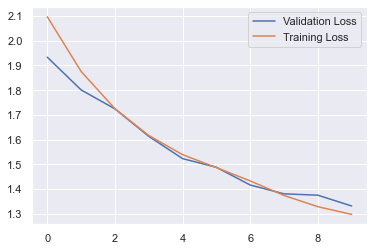

In [40]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

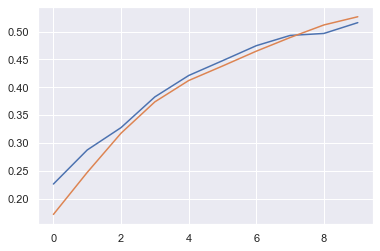

In [39]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend